# Notebook for data viz of portfolio
## This notebook contains the descriptive data analyses for credit card eligibility dataset from kaggle

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
credit_filepath = "C:/Users/EQUIPO/Desktop/py4e/dataset.csv"
credit_data = pd.read_csv(credit_filepath)

In [2]:
credit_data['Total_income'].dtype

dtype('float64')

In [24]:
credit_data.head(5)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [5]:
#define function to change 0 and 1 in gender by male - female
def fun1(num):
    if num == 1:
        return 'female'
    elif num == 0:
        return 'male'
    else:
        return None

In [7]:
sex = credit_data['Gender'].apply(fun1)
credit_data['Sex'] = sex
credit_data.head(5)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Sex
0,5008804,1,1,1,1,0,0,0,0,2,...,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1,female
1,5008806,1,1,1,0,0,0,0,0,2,...,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,female
2,5008808,0,0,1,0,1,1,0,0,1,...,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,male
3,5008812,0,0,1,0,0,0,1,0,1,...,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0,male
4,5008815,1,1,1,1,1,1,0,0,2,...,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0,female


C:\Users\EQUIPO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EQUIPO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EQUIPO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


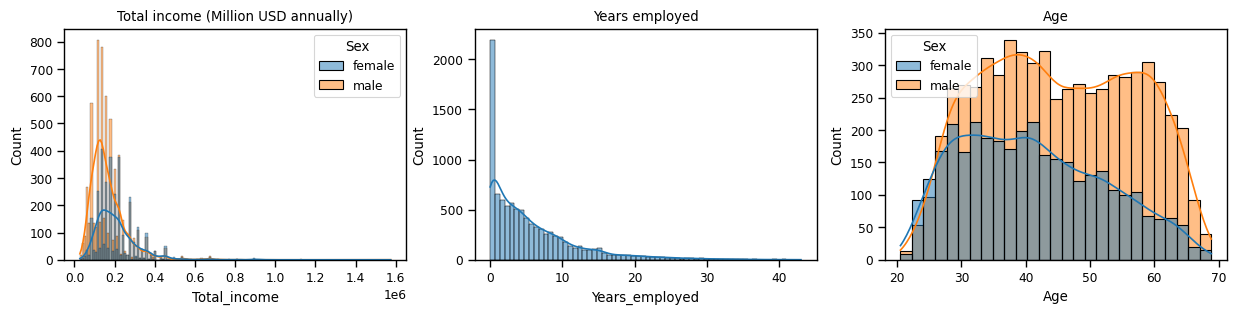

In [35]:
# Density plots of selected variables (Total income, years employed, age), probably the most important variables?
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(credit_data, ax=ax[0], x="Total_income", hue="Sex", kde= True)
ax[0].set_title("Total income (Million USD annually)")
sns.histplot(credit_data, ax=ax[1], x="Years_employed", kde=True)
ax[1].set_title("Years employed")
sns.histplot(credit_data, ax=ax[2], x="Age", hue = 'Sex', kde=True)
ax[2].set_title("Age")
plt.show()

In [24]:
credit_data['Total_income'].isnull().any()

False

In [28]:
#Quick way to check for null values
na_columns = [col for col in credit_data.columns
 if credit_data[col].isnull().any()]
print(na_columns)
#No Null values, this table is clean!

[]


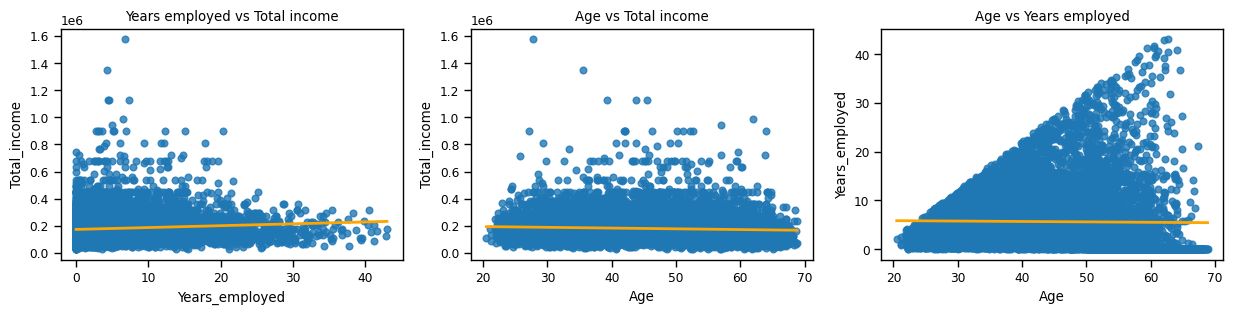

In [9]:
#Regplots or lmplots
sns.set_context("paper")
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.regplot(ax=ax[0], data = credit_data, x = 'Years_employed', y = 'Total_income',
           line_kws={'lw': 2, 'color': 'orange'})
ax[0].set_title("Years employed vs Total income")
sns.regplot(ax=ax[1], data = credit_data, x = 'Age', y = 'Total_income',
           line_kws={'lw': 2, 'color': 'orange'})
ax[1].set_title("Age vs Total income")
sns.regplot(ax=ax[2], data = credit_data, x = 'Age', y = 'Years_employed',
           line_kws={'lw': 2, 'color': 'orange'})
ax[2].set_title("Age vs Years employed")
plt.show()

<Axes: xlabel='Target', ylabel='Years_employed'>

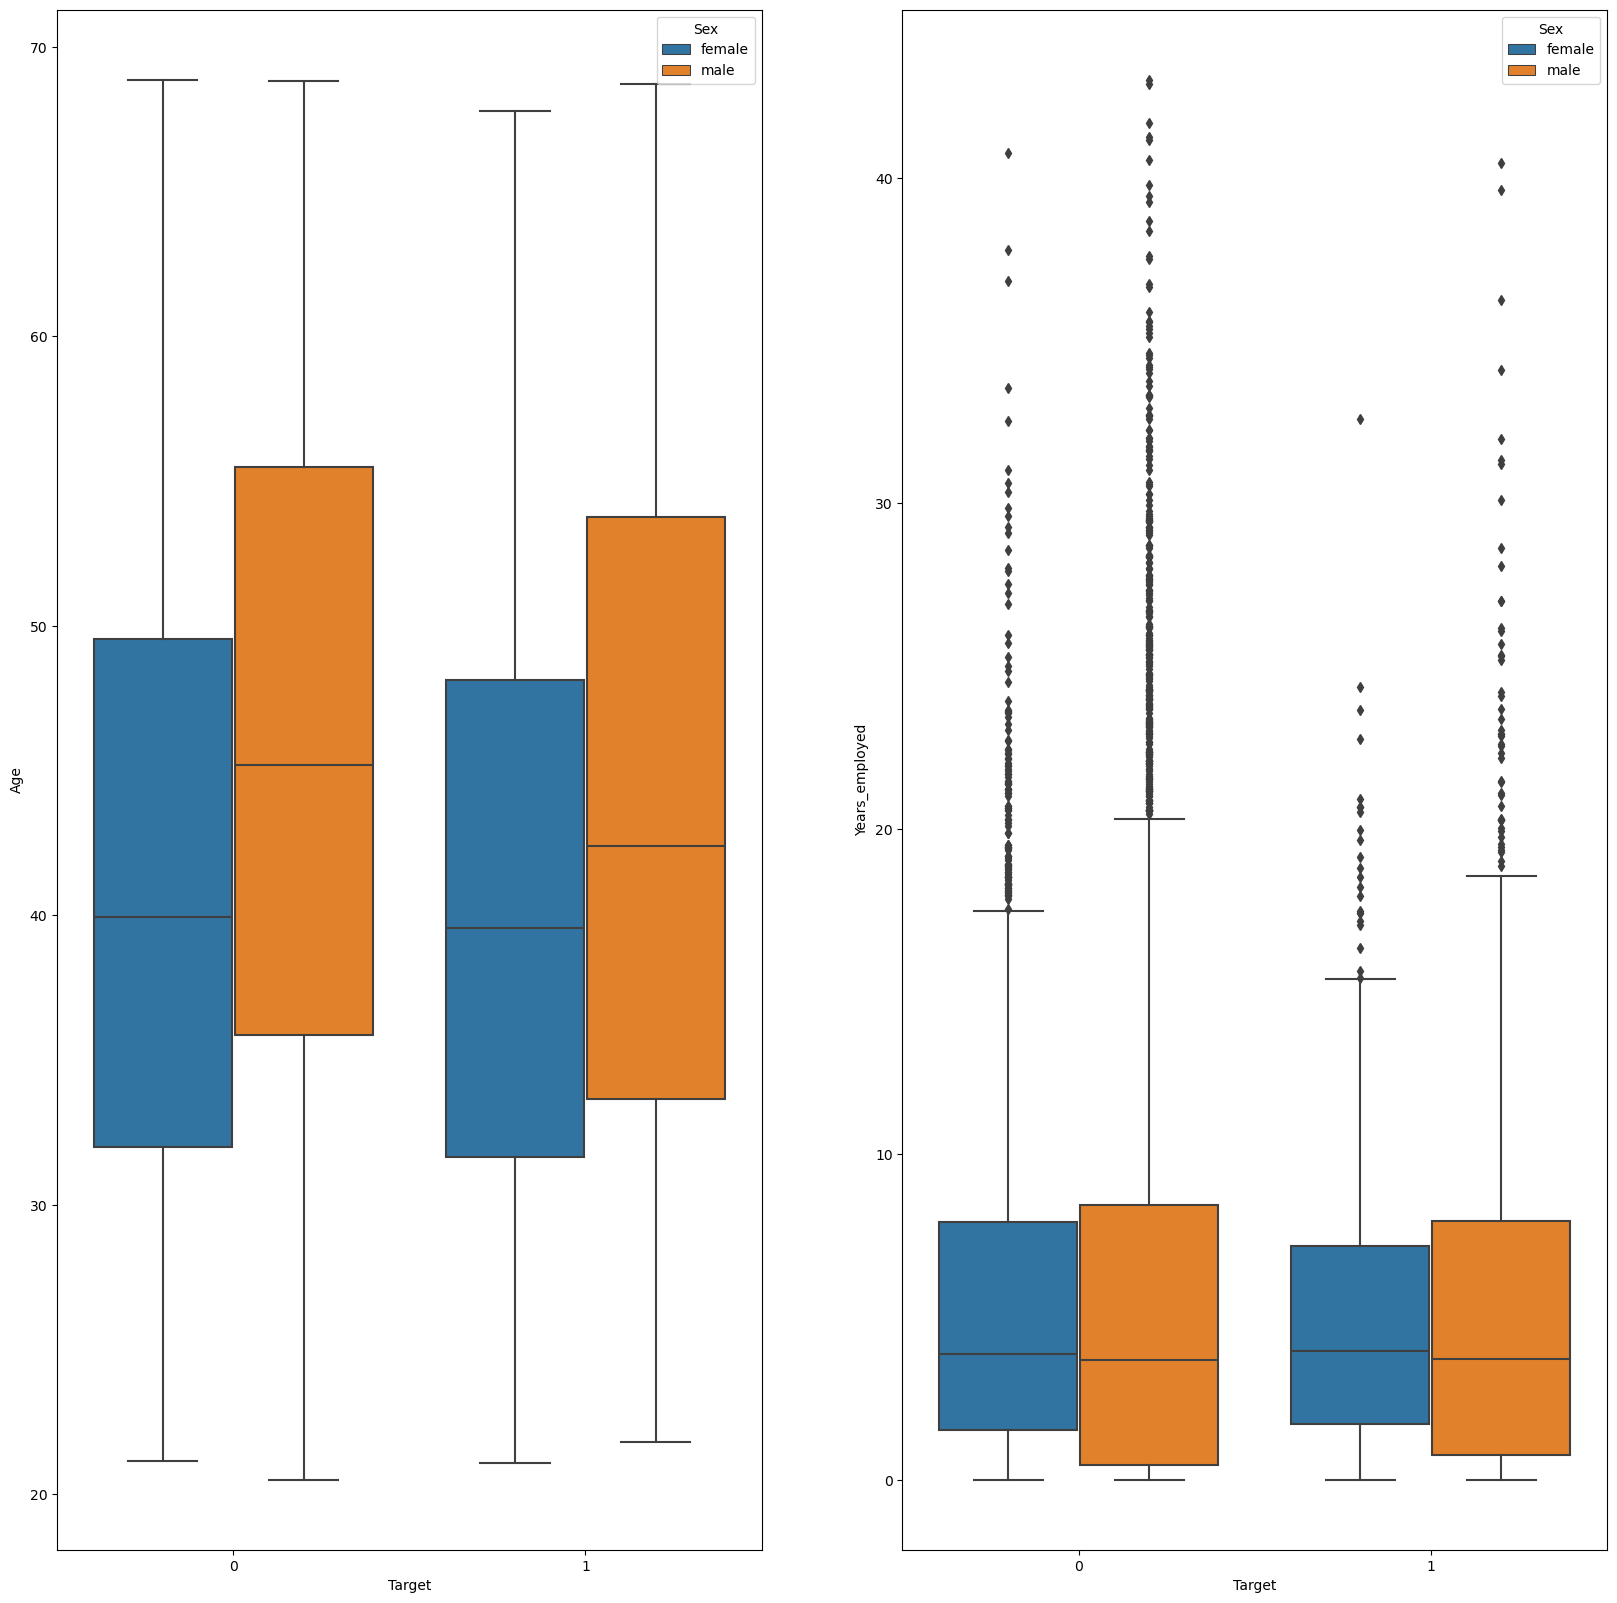

In [12]:
#boxplots age, Years_employed vs target
fig, ax = plt.subplots(1,2, figsize = (20,20))
sns.boxplot(data = credit_data, x = 'Target', y = 'Age', ax=ax[0], hue = 'Sex')
sns.boxplot(data = credit_data, x = 'Target', y = 'Years_employed', ax=ax[1], hue = 'Sex')

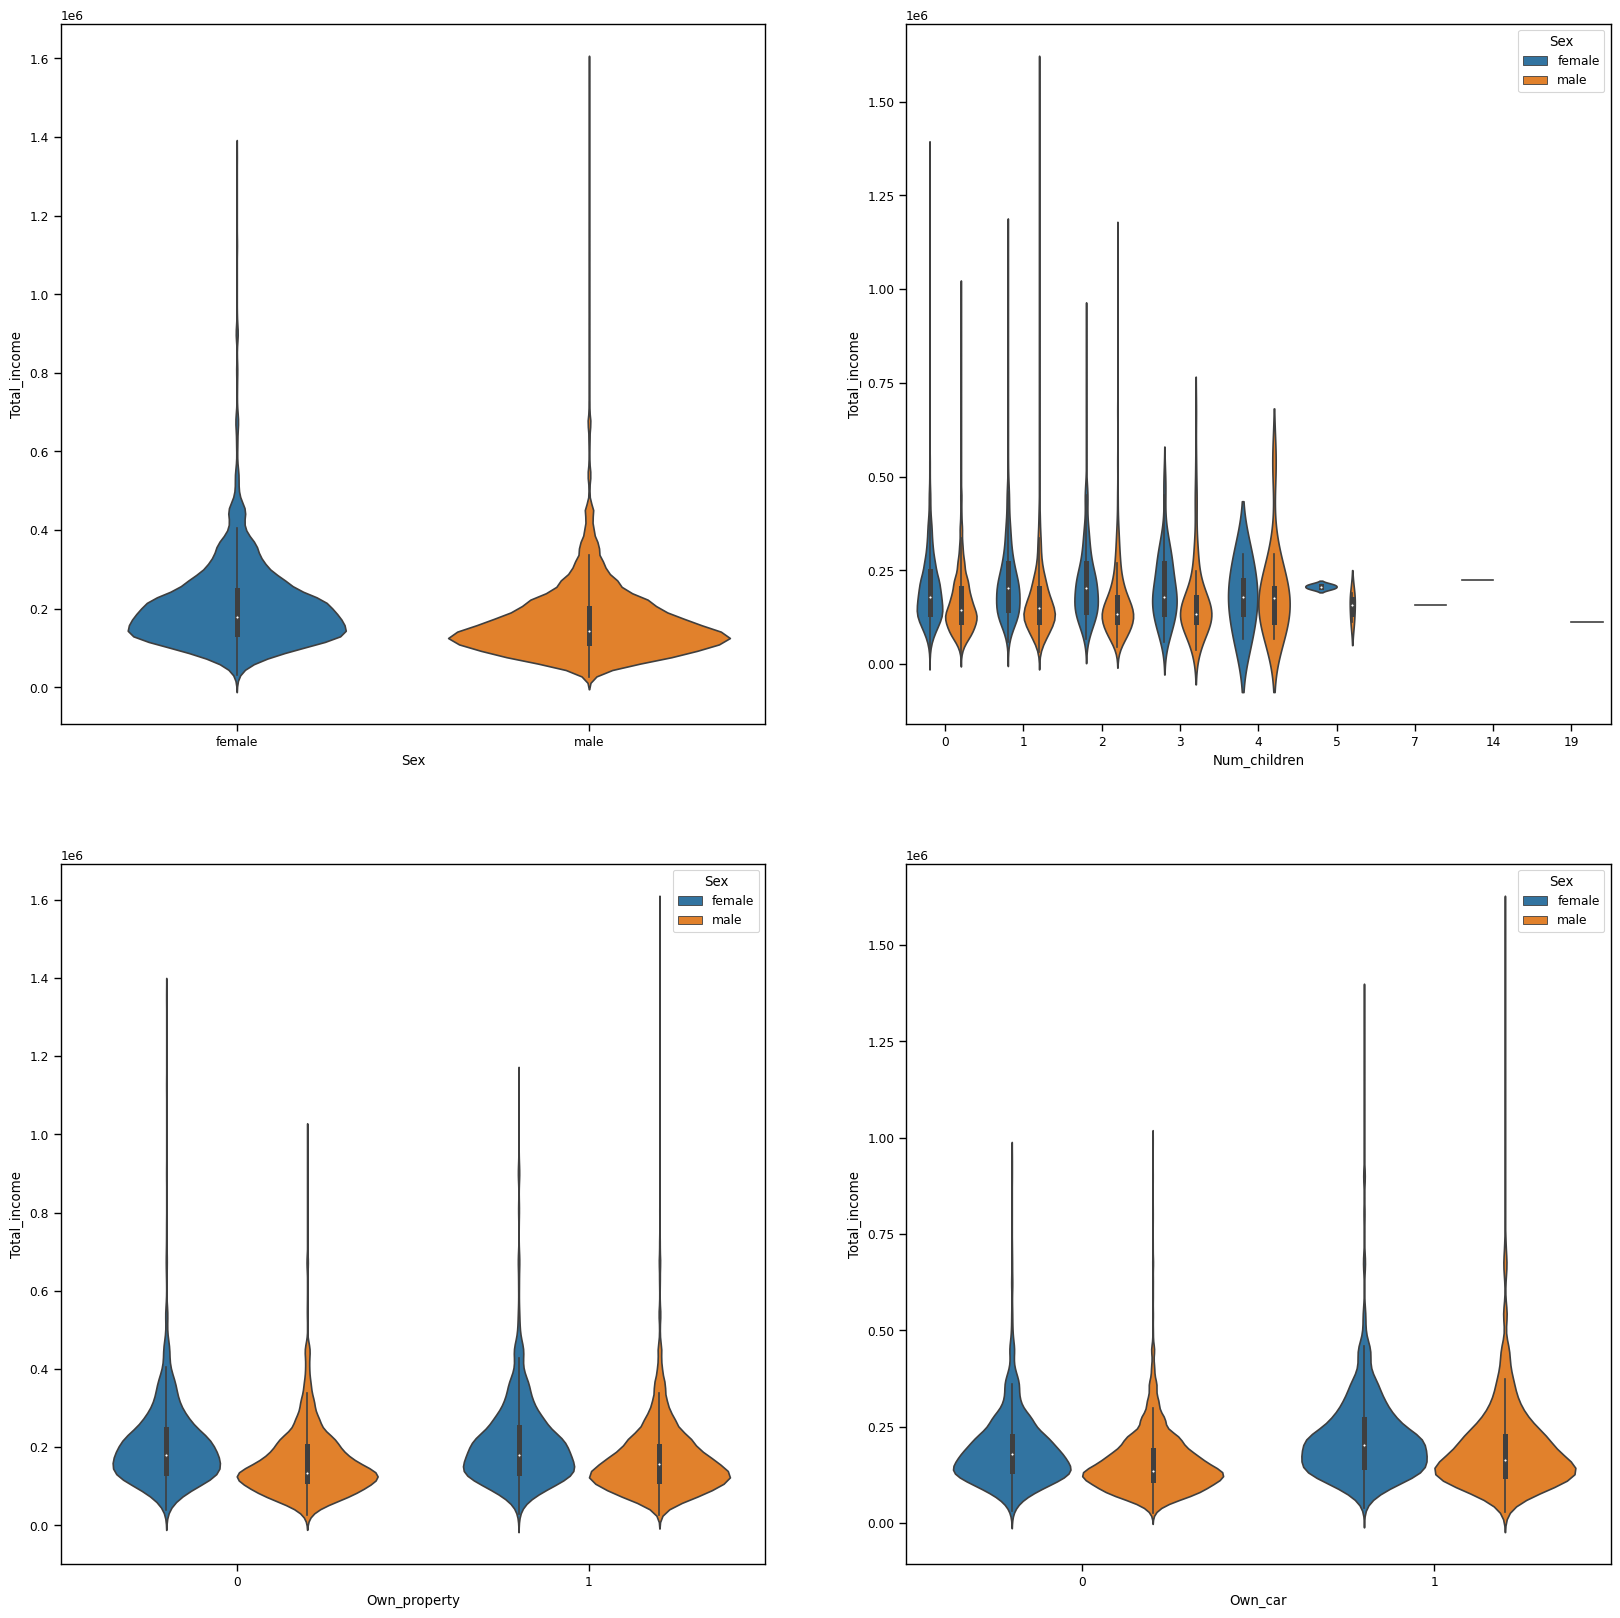

In [41]:
#boxplots or violin plots
sns.set_context("paper")
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.violinplot(data = credit_data, x = 'Sex', y = 'Total_income', ax=ax[0,0])
sns.violinplot(data = credit_data, x = 'Num_children', y = 'Total_income', ax=ax[0,1], hue = 'Sex')
sns.violinplot(data = credit_data, x = 'Own_property', y = 'Total_income', ax=ax[1,0], hue = 'Sex')
sns.violinplot(data = credit_data, x = 'Own_car', y = 'Total_income', ax=ax[1,1], hue = 'Sex')
plt.show()

[Text(0, 0, 'Rented apartment'),
 Text(1, 0, 'House / apartment'),
 Text(2, 0, 'Municipal apartment'),
 Text(3, 0, 'With parents'),
 Text(4, 0, 'Co-op apartment'),
 Text(5, 0, 'Office apartment')]

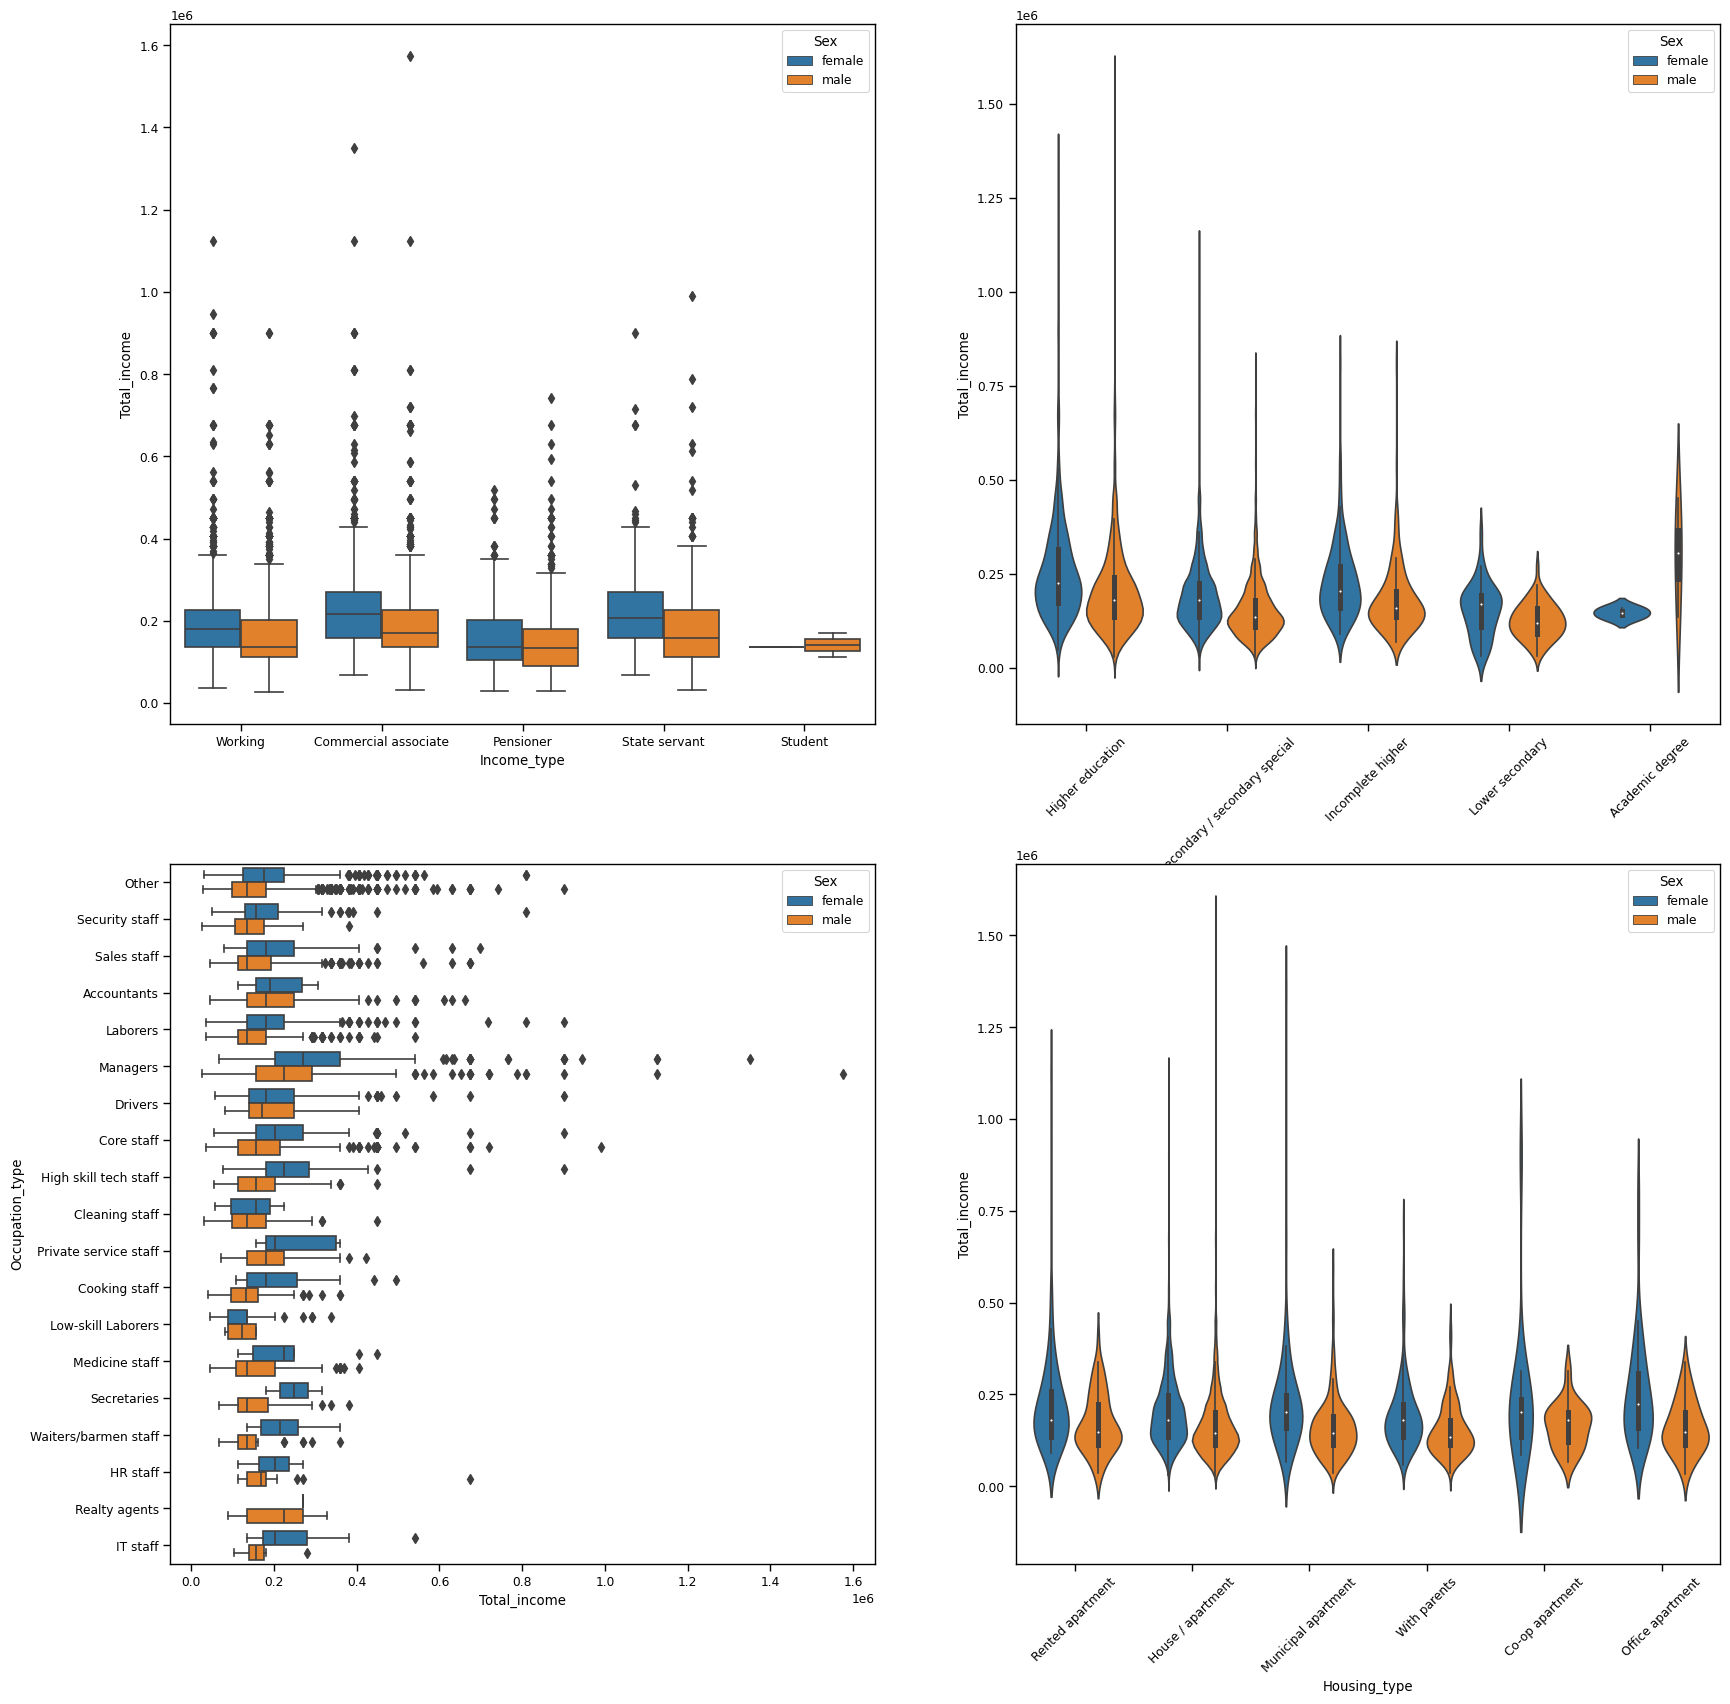

In [51]:
sns.set_context('paper')
fig, ax= plt.subplots(2, 2, figsize=(20,20))
sns.boxplot(data = credit_data, x = 'Income_type', y = 'Total_income', ax=ax[0,0], hue = 'Sex')
sns.violinplot(data = credit_data, x = 'Education_type', y = 'Total_income', ax=ax[0,1], hue = 'Sex')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
sns.boxplot(data = credit_data, x = 'Total_income', y = 'Occupation_type', ax=ax[1,0], hue = 'Sex')
sns.violinplot(data = credit_data, x = 'Housing_type', y = 'Total_income', ax=ax[1,1], hue = 'Sex')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)

<Axes: xlabel='Target', ylabel='Total_income'>

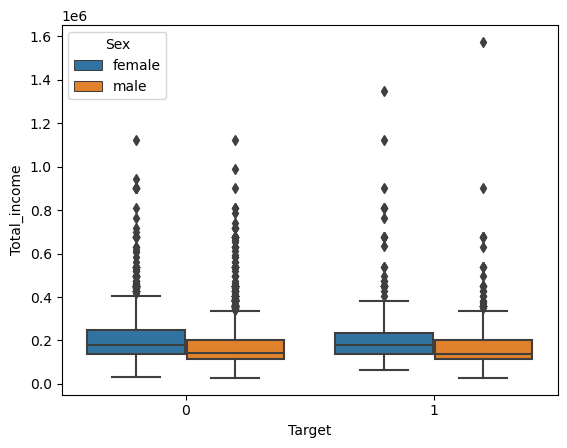

In [21]:
credit_data['Target'].value_counts()
sns.boxplot(data = credit_data, x = 'Target', y = 'Total_income', hue = 'Sex')

In [55]:
credit_data.loc[(credit_data.Target == 1) & (credit_data.Own_property == 0)]

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Sex
6,5008825,0,1,0,0,0,0,0,0,2,...,130500.0,29.210730,3.019911,Working,Incomplete higher,Married,House / apartment,Accountants,1,male
19,5008942,0,0,0,0,1,0,0,0,2,...,157500.0,37.350527,13.267897,Commercial associate,Higher education,Married,House / apartment,High skill tech staff,1,male
58,5009143,1,1,0,0,0,0,1,0,2,...,225000.0,50.073581,0.000000,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,Other,1,female
63,5009177,1,1,0,0,0,0,0,0,2,...,229500.0,50.172146,3.438811,Working,Incomplete higher,Married,Co-op apartment,Laborers,1,female
64,5009186,0,0,0,1,1,0,0,0,2,...,270000.0,48.113240,15.857957,Working,Higher education,Married,House / apartment,Managers,1,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,5142972,1,0,0,1,1,0,0,1,3,...,180000.0,29.175137,2.535302,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,female
9699,5142973,1,0,0,1,1,0,0,1,1,...,180000.0,29.175137,2.535302,Working,Secondary / secondary special,Married,House / apartment,Laborers,1,female
9700,5143578,1,1,0,1,0,0,0,0,2,...,157500.0,24.980664,2.628391,Working,Incomplete higher,Single / not married,With parents,Drivers,1,female
9702,5145760,0,1,0,0,0,1,0,0,2,...,135000.0,42.349946,13.235042,Working,Higher education,Married,House / apartment,Other,1,male
